In [23]:
import pandas
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

import matplotlib.pyplot as plt

In [24]:
df=pd.read_excel('./data/assay_m.xlsx')
df = df.dropna()
df

,Activity Value [uM]
30,676083.00000
31,758578.00000
32,812831.00000
33,512861.00000
34,107152.00000
...,...
1622,0.07943
1630,0.00284
1631,0.15000
1632,1.21500


## K-means clustering

In [33]:
km = KMeans(n_clusters=2)
km.fit(df)

KMeans(n_clusters=2)

In [34]:
df['cluster'] = km.labels_
df

,Activity Value [uM],cluster
30,676083.00000,0
31,758578.00000,0
32,812831.00000,0
33,512861.00000,0
34,107152.00000,0
...,...,...
1622,0.07943,0
1630,0.00284,0
1631,0.15000,0
1632,1.21500,0


In [35]:
clusters = df.groupby('cluster')

In [36]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[7.54823483e+03, 1.93050193e-02],
       [7.23000000e+06, 1.00000000e+00]])

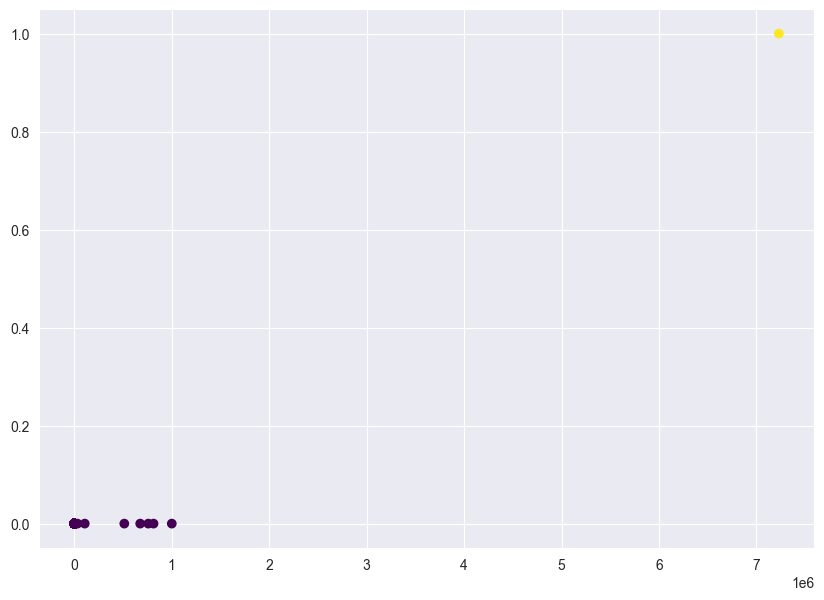

In [37]:
#plot the clusters scatter chart
plt.figure(figsize=(10, 7))
plt.scatter(df['Activity Value [uM]'], df['cluster'], c=df['cluster'], cmap='viridis')
plt.show()


<Axes: xlabel='cluster', ylabel='Activity Value [uM]'>

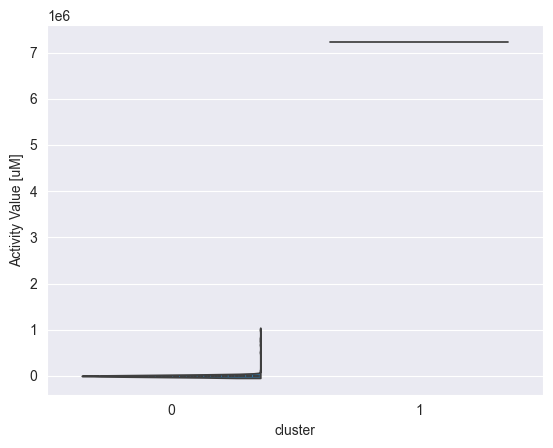

In [44]:
#violin plot
sns.violinplot(x='cluster', y='Activity Value [uM]', data=df, split=True, gap=.1, inner="quart")
